In [1]:
import bqplot
import numpy as np
import pandas as pd
import ipywidgets
import geopandas as gpd
import warnings
import plotly
from plotly import tools
import plotly.figure_factory as ff
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
from bqplot import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# loading the files required for analysis

covid_data=pd.read_csv("C:/Users/rajku/COVID-19 dataset/covid_19_data.csv", header=0)
covid19_time_series_confirmed=pd.read_csv("C:/Users/rajku/COVID-19 dataset/time_series_covid_19_confirmed.csv", header=0)
covid19_time_series_confirmed_US=pd.read_csv("C:/Users/rajku/COVID-19 dataset/time_series_covid_19_confirmed_US.csv", header=0)
covid19_time_series_deaths=pd.read_csv("C:/Users/rajku/COVID-19 dataset/time_series_covid_19_deaths.csv", header=0)
covid19_time_series_deaths_US=pd.read_csv("C:/Users/rajku/COVID-19 dataset/time_series_covid_19_deaths_US.csv", header=0)

In [3]:
# converting the column names of some files which required some changes

covid_data.rename(columns={'Province/State':'State', 'Country/Region':'Country'}, inplace=True)
covid19_time_series_confirmed.rename(columns={'Province/State':'State', 'Country/Region':'Country'}, inplace=True)
covid19_time_series_deaths.rename(columns={'Province/State':'State', 'Country/Region':'Country'}, inplace=True)

In [4]:
covid_data.head()

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
# FIlling the city names with country names where the city row is null

covid_data['State']=covid_data['State'].mask(pd.isnull, covid_data['Country'])
covid_data[covid_data['Confirmed'].isnull()]
countrywise_data=covid_data.copy()
countrywise_data.drop('State', axis=1, inplace=True)
countrywise_data=countrywise_data.groupby(['Country', 'ObservationDate'], as_index=False)['Confirmed', 'Deaths', 'Recovered'].sum()
countrywise_data['ObservationDate'] = countrywise_data['ObservationDate'].astype('datetime64[ns]')
countrywise_data
# latest_covid_data=covid_data.sort_values(by=['Country','State', 'ObservationDate'], ascending=[True, True]).groupby(['State', 'Country']).tail(1)

,Country,ObservationDate,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,"('St. Martin',)",2020-03-10,2.0,0.0,0.0
2,Afghanistan,2020-02-24,1.0,0.0,0.0
3,Afghanistan,2020-02-25,1.0,0.0,0.0
4,Afghanistan,2020-02-26,1.0,0.0,0.0
...,...,...,...,...,...
7356,occupied Palestinian territory,2020-03-12,0.0,0.0,0.0
7357,occupied Palestinian territory,2020-03-14,0.0,0.0,0.0
7358,occupied Palestinian territory,2020-03-15,0.0,0.0,0.0
7359,occupied Palestinian territory,2020-03-16,0.0,0.0,0.0


In [6]:
#temp_data

In [7]:
# x_sc=bqplot.DateScale()
# y_sc=bqplot.LinearScale()
# col_sc=bqplot.ColorScale(colors=['orange', 'red', 'green'])

In [8]:
# lines_1 = bqplot.Lines(x=np.array(temp_data['ObservationDate']), y=np.array(temp_data['Confirmed']), scales={'x': x_sc, 'y': y_sc})
# lines_2 = bqplot.Lines(x=np.array(temp_data['ObservationDate']), y=np.array(temp_data['Deaths']), scales={'x': x_sc, 'y': y_sc})
# lines_3 = bqplot.Lines(x=np.array(temp_data['ObservationDate']), y=np.array(temp_data['Recovered']), scales={'x': x_sc, 'y': y_sc})

In [9]:
# ax_x = bqplot.Axis(scale=x_sc, label='Observation Date')
# ax_y = bqplot.Axis(scale=y_sc, label='Total cases, deaths and recovered', orientation='vertical')
# ax_col=bqplot.Axis(scale=col_sc)

In [10]:
# fig = bqplot.Figure(marks = [lines_1, lines_2, lines_3], axes=[ax_x, ax_y])
# fig

In [11]:
# map_data=datewise_data.groupby('Country', as_index=False)['Confirmed', 'Deaths', 'Recovered'].sum()
# map_data

In [12]:
# figure = plt.figure(title="Date vs Covid Cases")
# line=plt.plot(x=np.array(temp_data['ObservationDate']), y= np.array(temp_data['Confirmed']), colors=['orange'])
# line=plt.plot(x=np.array(temp_data['ObservationDate']), y= np.array(temp_data['Deaths']), colors=['red'])
# line=plt.plot(x=np.array(temp_data['ObservationDate']), y= np.array(temp_data['Recovered']), colors=['green'])
# plt.show()

In [13]:
# countrywise_data[countrywise_data['Country']=='Mainland China'].count()

In [14]:
d=countrywise_data[countrywise_data['Country']=='US']
d

,Country,ObservationDate,Confirmed,Deaths,Recovered
6906,US,2020-01-22,1.0,0.0,0.0
6907,US,2020-01-23,1.0,0.0,0.0
6908,US,2020-01-24,2.0,0.0,0.0
6909,US,2020-01-25,2.0,0.0,0.0
6910,US,2020-01-26,5.0,0.0,0.0
...,...,...,...,...,...
6981,US,2020-04-06,366667.0,10783.0,19581.0
6982,US,2020-04-07,396223.0,12722.0,21763.0
6983,US,2020-04-08,429052.0,14695.0,23559.0
6984,US,2020-04-09,461437.0,16478.0,25410.0


In [15]:
# Creating a function to plot line graphs for COnfirmed, Deaths and Recovered cases
def line_graph(col):
    plt.figure(figsize=(15,7))
    tem_data=countrywise_data[countrywise_data['Country']==col]
    plt.plot('ObservationDate', 'Confirmed',data=tem_data, c='orange', marker='o')
    plt.plot('ObservationDate', 'Deaths',data=tem_data, c='red', marker='o')
    plt.plot('ObservationDate', 'Recovered',data=tem_data, c='green',marker='o')
    plt.title("COVID 19 Cases Countrywise"+col)
    plt.xlabel("Observation Date")
    plt.ylabel('Number of Cases')
    plt.show()

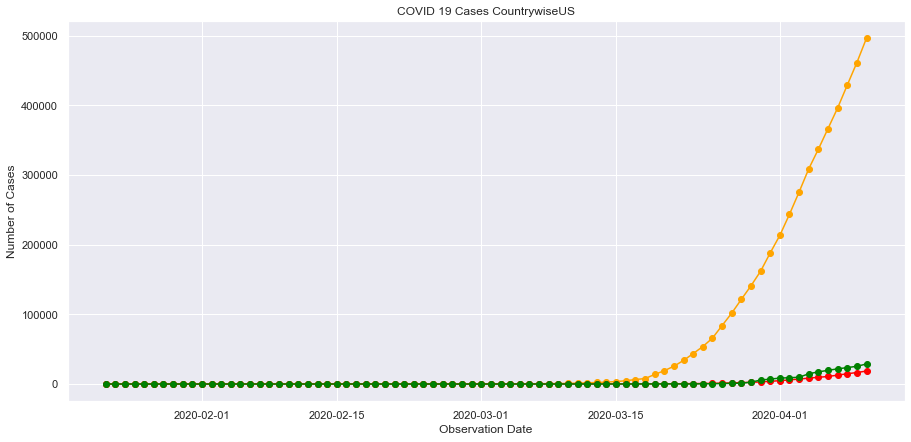

In [16]:
# Calling the function and passing the COuntry name as the argument 
line_graph(col="US")

In [17]:
# downloaded shape file to plot geo map

shape_file=gpd.read_file('ne_110m_admin_0_countries.shp')[['ADMIN','ADM0_A3', 'geometry']]
shape_file.columns=['Country','Country_code', 'geometry']
shape_file

,Country,Country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...
172,Republic of Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Kosovo,KOS,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Trinidad and Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [18]:
#unique countries present in COIVD_19 dataset
countrywise_data['Country'].unique()

array([' Azerbaijan', "('St. Martin',)", 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Denmark', 'Diamond Princess', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe Island

In [19]:
#sorted(shape_file['Country_code'].unique())

In [20]:
# countrywise_data['Country'].map({'Mainland China':"China", "Macau":"China", "Hong Kong":"China"})
# countrywise_data['Country'].map({'Jersey':'France', 'Martinique':'France', 'Mayotte':'France', 'Monaco':'France','Reunion':'France', 'Saint Barthelemy':'France'})
# countrywise_data['Country']=countrywise_data['Country'].map({'Congo (Brazzaville)':'Democratic Republic of the Congo', 'Congo (Kinshasa)':'Democratic Republic of the Congo'})
# countrywise_data['Country']=countrywise_data['Country'].map({'Czech Republic':'Czechia'})
# countrywise_data['Country']=countrywise_data['Country'].map({'French Guiana':'French Southern and Antarctic Lands'})
# countrywise_data['Country']=countrywise_data['Country'].map({'Liechtenstein':'Switzerland'})
# countrywise_data['Country']=countrywise_data['Country'].map({'MS Zaandam':'Netherlands', 'St. Martin':'Netherlands'})
# countrywise_data['Country']=countrywise_data['Country'].map({'Malta':'Italy', 'San Marino':'Italy'})
# countrywise_data['Country']=countrywise_data['Country'].map({'North Ireland':'Ireland', 'Republic of Ireland':'Ireland'})
# countrywise_data['Country']=countrywise_data['Country'].map({'North Macedonia':'Greece'})
# countrywise_data['Country']=countrywise_data['Country'].map({'Saint Kitts and Nevis':'Trinidad and Tobago', 'Saint Lucia':'Trinidad and Tobago',
#                                                             'Saint Vincent and the Grenadines':'Trinidad and Tobago'})
# countrywise_data['Country']=countrywise_data['Country'].map({'Sao Tome and Principe':'South Africa'})
# countrywise_data['Country']=countrywise_data['Country'].map({'Serbia':'Russia', 'Seychelles':'Russia'})
# countrywise_data['Country']=countrywise_data['Country'].map({'Timor-Leste':'Indonesia'})
# countrywise_data['Country']=countrywise_data['Country'].map({'Tanzania':'United Republic of Tanzania'})
# countrywise_data['Country']=countrywise_data['Country'].map({'West Bank and Gaza':'Israel', 'occupied Palestinian territory':'Israel'})
# countrywise_data['Country']=countrywise_data['Country'].map({'Burma':'Myanmar'})
# countrywise_data['Country']=countrywise_data['Country'].map({'UK':'United Kingdom'})
# countrywise_data['Country']=countrywise_data['Country'].map({'US':'United States of America'})
# countrywise_data['Country']=countrywise_data['Country'].map({'Gambia':'The Gambia'})

In [21]:
# As there was discrepency in the country names, tried to merge countires and change the names so that we can match maximum number of countries
# in both the dataset

countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'China' if (x=='Mainland China') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'France' if (x=='Jersey' or x=='Martinique' or x=='Mayotte' or x=='Monaco' or x=='Reunion' or x=='Saint Barthelemy') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'Democratic Republic of the Congo' if (x=='Congo (Brazzaville)' or x=='Congo (Kinshasa)' or x=='Republic of the Congo') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'Czechia' if (x=='Czech Republic') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'French Southern and Antarctic Lands' if (x=='French Guiana') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'Switzerland' if (x=='Liechtenstein') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'Netherlands' if (x=='MS Zaandam' or x=='St. Martin') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'Italy' if (x=='Malta' or x=='San Marino') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'Ireland' if (x=='North Ireland' or x=='Republic of Ireland') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'Greece' if (x=='North Macedonia') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'Trinidad and Tobago' if (x=='Saint Kitts and Nevis' or x=='Saint Lucia' or x=='Saint Vincent and the Grenadines') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'South Africa' if (x=='Sao Tome and Principe') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'Russia' if (x=='Serbia' or x=='Seychelles') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'Indonesia' if (x=='Timor-Leste') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'United Republic of Tanzania' if (x=='Tanzania') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'Israel' if (x=='West Bank and Gaza' or x=='occupied Palestinian territory') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'Myanmar' if (x=='Burma') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'United Kingdom' if (x=='UK') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'United States of America' if (x=='US') else x)
countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'The Gambia' if (x=='Gambia') else x)

In [22]:

countrywise_data=countrywise_data.groupby(['Country', 'ObservationDate'], as_index=False)['Confirmed', 'Deaths', 'Recovered'].sum()

In [23]:
# merge the shape file and COVID data

data=pd.merge(countrywise_data, shape_file, on='Country', how='inner')
data

,Country,ObservationDate,Confirmed,Deaths,Recovered,Country_code,geometry
0,Afghanistan,2020-02-24,1.0,0.0,0.0,AFG,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Afghanistan,2020-02-25,1.0,0.0,0.0,AFG,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
2,Afghanistan,2020-02-26,1.0,0.0,0.0,AFG,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
3,Afghanistan,2020-02-27,1.0,0.0,0.0,AFG,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
4,Afghanistan,2020-02-28,1.0,0.0,0.0,AFG,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
...,...,...,...,...,...,...,...
6139,Zimbabwe,2020-04-06,10.0,1.0,0.0,ZWE,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
6140,Zimbabwe,2020-04-07,11.0,2.0,0.0,ZWE,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
6141,Zimbabwe,2020-04-08,11.0,3.0,0.0,ZWE,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
6142,Zimbabwe,2020-04-09,11.0,3.0,0.0,ZWE,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [24]:
#data.to_json('merged_json', default_handler=str)
#Read data to json.
# merged_json = json.loads(data.to_json(default_handler=str))
# #Convert to String like object.
# json_data = json.dumps(merged_json)

In [25]:
# Tried to plot the geo data using bokeh

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

In [26]:
# geosource = GeoJSONDataSource(geojson = json_data)

# #Define a sequential multi-hue color palette.
# palette = brewer['YlGnBu'][8]
# #Reverse color order so that dark blue is highest obesity.
# palette = palette[::-1]
# #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
# color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)

# #Define custom tick labels for color bar.
# tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}
# #Create color bar. 
# color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
# border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
# #Create figure object.
# p = figure(title = 'Share of adults who are obese, 2016', plot_height = 600 , plot_width = 950, toolbar_location = None)
# p.xgrid.grid_line_color = None
# p.ygrid.grid_line_color = None

# #Add patch renderer to figure. 
# p.patches('xs','ys', source = geosource,fill_color = {'field' :'Confirmed', 'transform' : color_mapper},
#           line_color = 'black', line_width = 0.25, fill_alpha = 1)

# #Specify figure layout.
# p.add_layout(color_bar, 'below')

# #Display figure inline in Jupyter Notebook.
# output_notebook()

# #Display figure.
# show(p)

In [27]:
new_df=data.groupby('Country', as_index=False)['Confirmed'].sum()

In [28]:
new_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Southern and Antarctic Lands', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
 

In [29]:
# country_codes=pd.read_csv('iso_3166_country_codes.csv', header=None, names=['Country', 'Country_code_2', 'Country_code_3', 'Country_num_code'], encoding='latin-1')
# #countrywise_data['Country']=countrywise_data['Country'].str.strip().str.replace("[(),']", '')
# country_codes

In [30]:
#grouping covid data by Country to get countrywise data
new_data=data.groupby(['Country', 'Country_code'], as_index=False)['Confirmed', 'Deaths', 'Recovered'].sum()

In [31]:
# Choropleth graph using plotly

import plotly.express as px
fig = px.choropleth(new_data, locations="Country_code",
                    color="Confirmed", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.diverging.Geyser)
fig.show()

In [32]:
# import plotly.express as px

# fig = go.FigureWidget(data=go.Choropleth(locations = new_data['Country_code'],
#     z = new_data['Confirmed'],
#     text = new_data['Country'],
#     colorscale = 'Blues',
#     autocolorscale=False,
#     reversescale=True,
#     marker_line_color='darkgray',
#     marker_line_width=0.5,
#     colorbar_title = 'Total COVID-19 cases',
# ))

# fig.update_layout(
#     title_text='2014 Global GDP',
#     geo=dict(
#         showframe=False,
#         showcoastlines=False,
#         projection_type='equirectangular'
#     ))

# out = Output()
# @out.capture(clear_output=True)
# def handle_click(trace, points, state):
#     print(points.point_inds)

# data.on_click(handle_click)

# VBox([fig, out])

# fig.show()

In [33]:
# Extracting the data that needs to be plotted in a list

fips=new_data['Country_code'].tolist()
values=new_data['Confirmed'].tolist()
country=new_data['Country'].tolist()

In [34]:
# Plotting the geomap and getting the index number of country when clicked on

from ipywidgets import VBox, HBox, Output

d=[]
f = go.FigureWidget([go.Choropleth(locations = fips, text = country, z=values)])

trace=f.data[0]
#colorscale="Blues"
trace.colorscale='Geyser'
trace.hovertext=country
#print(trace)
out = Output()
@out.capture(clear_output=True)
def click_fn(trace, points, state):
    print(points.point_inds[0])
    #country=new_data.ix[x]['Country']
    

country_index=d
trace.on_click(click_fn)

# def select_country(value):
#     for i in value:
#         country=new_data.ix[i]['Country']
#         print(country)
#         fig=line_graph(country)
#         return fig
    
# f2=select_country(country_index)

VBox([f, out])

    'data': [{'colorscale': [[0.0, 'rgb(0, 128, 128)'], [0.16666666666666666,
  …

In [35]:
# Linking Geo plot with line graph (without any titles and naming convetions)

f = go.FigureWidget([go.Choropleth(locations = fips, text = country, z=values)])   # plotting the Choropleth graph

trace=f.data[0]
#colorscale="Blues"
trace.colorscale='Geyser'
trace.hovertext=country
#print(trace)

out = Output()

@out.capture(clear_output=True)  # capturing the output
def click_fn(trace, points, state):
    country=new_data.ix[points.point_inds[0]]['Country']     # using the index extracted to get the country name
    
    fig=go.FigureWidget()          # defining empty figure widget
    fig
    temp_data=countrywise_data[countrywise_data['Country']==country]        # extracting the data with same country name
    fig.add_scatter(x=temp_data['ObservationDate'], y=temp_data['Confirmed'], mode='lines+markers', name='Covid-19 confirmed cases')
    fig.add_scatter(x=temp_data['ObservationDate'], y=temp_data['Deaths'], mode='lines+markers', name='Deaths due to Covid-19')
    fig.add_scatter(x=temp_data['ObservationDate'], y=temp_data['Recovered'], mode='lines+markers', name='Total recovered patients')
    fig.show()
    
    
trace.on_click(click_fn)   #calling the click function

VBox([f, out])  # plotting the output of map and function in Vertical Box

    'data': [{'colorscale': [[0.0, 'rgb(0, 128, 128)'], [0.16666666666666666,
  …

In [36]:
# Linking Geo plot with line graph with titles and naming convetions

f = go.FigureWidget([go.Choropleth(locations = fips, text = country, z=values, colorbar_title='Number of COVID-19 cases')])  # plotting the Choropleth graph

trace=f.data[0]
#colorscale="Blues"
trace.colorscale='Geyser'    # setting the colorscale
trace.hovertext=country      # setting the hovertext data

f.update_layout(             # updating the laout of the graph
    title="World Map Visualization for COVID-19 cases",
    width=1000, height=600)
#print(trace)

out = Output()         # getting the data when clicked

@out.capture(clear_output=True)
def click_fn(trace, points, state):
    country=new_data.ix[points.point_inds[0]]['Country']    # extracting the country name using the index of the click
    
    fig=go.FigureWidget()       # creating empty Figure widget for the line graph
    fig
    temp_data=countrywise_data[countrywise_data['Country']==country]   # extracting the rows with similar country name
    fig.add_scatter(x=temp_data['ObservationDate'], y=temp_data['Confirmed'], mode='lines+markers', name='Covid-19 confirmed cases')
    fig.add_scatter(x=temp_data['ObservationDate'], y=temp_data['Deaths'], mode='lines+markers', name='Deaths due to Covid-19')
    fig.add_scatter(x=temp_data['ObservationDate'], y=temp_data['Recovered'], mode='lines+markers', name='Total recovered patients')
    
    fig.update_layout(title='Joint scatter plot showing Confirmed, Deaths and Recoverd cases of '+country,
                      xaxis_title="Observation Dates",
                      yaxis_title="Confirmed, Deaths and Recovered cases", width=1000, height=600)
    fig.show()
    
    
trace.on_click(click_fn)

VBox([f, out])

    'data': [{'colorbar': {'title': {'text': 'Number of COVID-19 cases'}},
     …

In [37]:
# Interactive Time Series Line Graph country wise
# crrating a function to extract unique country names

ALL="All"
def unique_countries(country):
    unique_country=country.unique().tolist()
    unique_country.sort
    return unique_country

In [38]:
# Creating widgets for countries and extracting the data based on the seletected country

dropdown_country=ipywidgets.Dropdown(options=unique_countries(countrywise_data.Country))

output_country=ipywidgets.Output()

def dropdown_event_handler(change):
    output_country.clear_output()
    with output_country:
        if(change.new==''):
            display(countrywise_data)
        else:
            display(countrywise_data[countrywise_data.Country==change.new])
    return output_country
     
dropdown_country.observe(dropdown_event_handler, names='value')

display(dropdown_country)

Dropdown(options=(' Azerbaijan', "('St. Martin',)", 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', …

In [39]:
display(output_country)

Output()

In [40]:
# Adding All value to dropdown to plot top 10 coutries msot affected with COVID-19

ALL='All'
def x_variable(x):
    unique_country=x['Country'].unique().tolist()
    unique_country.insert(0, 'All')
    return unique_country

In [41]:
#countrywise_data[countrywise_data['Country']=='Azerbaijan']

In [42]:
# extracting top 10 countries that has most number of covid cases

con=countrywise_data.sort_values('Confirmed', ascending=False)['Country'].unique()[:10]
new_df=pd.DataFrame(columns=['Country','ObservationDate','Confirmed', 'Deaths', 'Recovered'])
for i in con:
    temp=countrywise_data[countrywise_data['Country']==i]
    new_df=pd.concat([new_df, temp], ignore_index=True)
#     new_df.append(temp)
    
new_df['Country'].unique()

array(['United States of America', 'Spain', 'Italy', 'France', 'Germany',
       'China', 'United Kingdom', 'Iran', 'Turkey', 'Belgium'],
      dtype=object)

In [43]:
# plotting line graph

Country=ipywidgets.Dropdown(options=(list(x_variable(countrywise_data))))      # calling the unique countries functon defined above

def plot_line_graph(Country):
    
    plt.figure(figsize=(15,8))                # setting the figure size
    
    if Country=='All':                        # plotting graph with top 10 countries with most number of covid-19 cases if dropdown value is 'ALL'  
        
        color=['Red', 'Green', 'Blue', 'Yellow', 'Magenta', 'Cyan', 'Orange', 'limegreen', 'indigo', 'lightblue']
        con=countrywise_data.sort_values('Confirmed', ascending=False)['Country'].unique()[:10]  # extrating top 10 country names
        new_df=pd.DataFrame(columns=['Country','ObservationDate','Confirmed', 'Deaths', 'Recovered'])
        for (i,j) in zip(con,color):
            temp=pd.DataFrame(columns=['Country','ObservationDate','Confirmed', 'Deaths', 'Recovered']) # defining empty dataframe
            data_temp=countrywise_data[countrywise_data['Country']==i]      # extacting countrywise data
            new_df=pd.concat([data_temp, temp], ignore_index=True)
            plt.plot('ObservationDate','Confirmed', data=new_df, c=j, marker='o')
            print(i+':' +j)
        plt.title("Top 10 countires with most COVID-19 cases")
        plt.xlabel("Observation Date")
        plt.ylabel("Total Covid Cases")
        plt.xticks(rotation=90)
        
    else:
        temp_df=countrywise_data[countrywise_data['Country']==Country]    # extracting data based on the dropdown value

        plt.plot('ObservationDate','Confirmed', data=temp_df, c='orange', marker='o')
        plt.plot('ObservationDate','Deaths', data=temp_df, c='red', marker='o')
        plt.plot('ObservationDate','Recovered', data=temp_df, c='green', marker='o')
        plt.title("COVID-19 cases in "+ Country)
        plt.xlabel("Observation Date")
        plt.ylabel("Total Covid Cases")
        plt.xticks(rotation=90)
        plt.legend()
        plt.show()
    

ipywidgets.interact(plot_line_graph, Country=Country)

interactive(children=(Dropdown(description='Country', options=('All', ' Azerbaijan', "('St. Martin',)", 'Afgha…

<function __main__.plot_line_graph(Country)>

# Dashboard description

The above dashboard is created using the COVID-19 data extracted from Kaggle. This data shows the number of Confirmed, Deaths and Recovered cases in countries. One can see the line graph representing the number of COVID cases since January, 22nd to April 10th 2020. All one have to do is select the country name from the Country dropdown for which they want to see the COVID cases and the graph will automatically display the number of the data presepctive to that country. If one wants to see top 10 countries with most number of COVID cases, then all one has to do is select the first value in the dropdown which is 'All' and the line graph for top 10 countries will be displayed.

Note: I was trying to make interactive dashboard using the line graph and Geomap where if a person clicks on a country in the geomap then the line graph will automatically display the data relative to that country.I was able to connect both the graphs using function but I wasn't able to make the two graphs interactive using ipywidgets.

I had to find and add the shape file to plot choropleth geo map. THis shape file contains digit code for every country aorund the world. By merging the shape file and COVID-19 dataset, we were able to plot the COVID data on a geo map

In [44]:
statewise_data=covid_data.copy()

In [45]:
statewise_data=statewise_data.groupby(['Country', 'State', 'ObservationDate'], as_index=False)['Confirmed', 'Deaths', 'Recovered'].sum()
statewise_data[statewise_data["Country"]=='Mainland China']['State'].nunique()

31

In [46]:
statewise_data['State']=statewise_data['State'].str.replace("[().']",'')
statewise_data[['County/State','State']] = statewise_data.pop('State').str.split(',\s*', n=0, expand=True)

In [47]:
statewise_data['State'].replace("None", 'County/State', inplace=True)

In [48]:
#pd.set_option('display.max_rows',9999)
statewise_data.loc[statewise_data['State'].isnull(), 'State']=statewise_data['County/State']
statewise_data[statewise_data['Country']=="Canada"]

,Country,ObservationDate,Confirmed,Deaths,Recovered,County/State,State
1573,Canada,02/28/2020,1.0,0.0,0.0,Montreal,QC
1574,Canada,02/29/2020,1.0,0.0,0.0,Montreal,QC
1575,Canada,03/01/2020,1.0,0.0,0.0,Montreal,QC
1576,Canada,03/02/2020,1.0,0.0,0.0,Montreal,QC
1577,Canada,03/03/2020,1.0,0.0,0.0,Montreal,QC
...,...,...,...,...,...,...,...
2101,Canada,04/06/2020,6.0,0.0,0.0,Yukon,Yukon
2102,Canada,04/07/2020,7.0,0.0,0.0,Yukon,Yukon
2103,Canada,04/08/2020,7.0,0.0,0.0,Yukon,Yukon
2104,Canada,04/09/2020,7.0,0.0,0.0,Yukon,Yukon


In [49]:
ALL='All'
def x_variable_state(x,y):
    state_df=x[x['Country']==y]
    unique_state=state_df['State'].unique().tolist()
    print(unique_state)

In [50]:
# World wide covid confirmed cases data country and state wise (if states are given) except US

world_state_confirmed_data=covid19_time_series_confirmed.copy()
world_state_confirmed_data.loc[world_state_confirmed_data['State'].isnull(), "State"]=world_state_confirmed_data['Country']
world_state_confirmed_data.drop(columns=['Lat', 'Long'], axis=1, inplace=True)
world_state_confirmed_data=world_state_confirmed_data.melt(id_vars=["State", "Country"], var_name="ObservationDate", value_name="Confirmed")
world_state_confirmed_data=world_state_confirmed_data.groupby(['State', 'ObservationDate', 'Country'], as_index=False)['Confirmed'].sum()
world_state_confirmed_data=world_state_confirmed_data[world_state_confirmed_data['Country']!='US']

In [51]:
# World wide covid deaths cases data country and state wise (if states are given) except US

world_state_deaths_data=covid19_time_series_deaths.copy()
world_state_deaths_data.loc[world_state_deaths_data['State'].isnull(), "State"]=world_state_deaths_data['Country']
world_state_deaths_data.drop(columns=['Lat', 'Long'], axis=1, inplace=True)
world_state_deaths_data=world_state_deaths_data.melt(id_vars=["State", "Country"], var_name="ObservationDate", value_name="Confirmed")
world_state_deaths_data=world_state_deaths_data.groupby(['State', 'ObservationDate', 'Country'], as_index=False)['Confirmed'].sum()
world_state_deaths_data=world_state_deaths_data[world_state_deaths_data['Country']!='US']

In [52]:
world_covid_data=pd.merge(world_state_confirmed_data,world_state_deaths_data, left_index=True, right_index=True)
world_covid_data.drop(world_covid_data.columns[[4,5,6]], axis=1, inplace=True)
world_covid_data.columns=['State', 'ObservationDate', 'Country', 'Confirmed', 'Deaths']
world_covid_data=world_covid_data[['State', 'Country', 'ObservationDate', 'Confirmed', 'Deaths']]
world_covid_data.shape

(21040, 5)

In [53]:
US_confirmed_data=covid19_time_series_confirmed_US.copy()
US_confirmed_data.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_','Combined_Key'], axis=1, inplace=True)
US_confirmed_data.rename(columns={'Province_State':'State', 'Country_Region':'Country'}, inplace=True)
US_confirmed_data=US_confirmed_data.melt(id_vars=["State", "Country"], var_name="ObservationDate", value_name="Confirmed")
US_confirmed_data=US_confirmed_data.groupby(['State', 'ObservationDate', 'Country'], as_index=False)['Confirmed'].sum()
US_confirmed_data.head()

,State,ObservationDate,Country,Confirmed
0,Alabama,1/22/20,US,0
1,Alabama,1/23/20,US,0
2,Alabama,1/24/20,US,0
3,Alabama,1/25/20,US,0
4,Alabama,1/26/20,US,0


In [54]:
pd.set_option('display.max_rows',999)
US_death_data=covid19_time_series_deaths_US.copy()
US_death_data.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_','Combined_Key', 'Population'], axis=1, inplace=True)
US_death_data.rename(columns={'Province_State':'State', 'Country_Region':'Country'}, inplace=True)
US_death_data=US_death_data.melt(id_vars=["State", "Country"], var_name="ObservationDate", value_name="Deaths")
US_death_data=US_death_data.groupby(['State', "ObservationDate", 'Country'], as_index=False)['Deaths'].sum()
US_death_data.head()

,State,ObservationDate,Country,Deaths
0,Alabama,1/22/20,US,0
1,Alabama,1/23/20,US,0
2,Alabama,1/24/20,US,0
3,Alabama,1/25/20,US,0
4,Alabama,1/26/20,US,0


In [55]:
US_covid_data=pd.merge(US_confirmed_data,US_death_data, left_index=True, right_index=True)
US_covid_data.drop(US_covid_data.columns[[4,5,6]], axis=1, inplace=True)
US_covid_data.columns=['State', 'ObservationDate', 'Country', 'Confirmed', 'Deaths']
#US_covid_data.sort_values(['State', 'ObservationDate']).head(999)
US_covid_data=US_covid_data[['State', 'Country', 'ObservationDate', 'Confirmed', 'Deaths']]
US_covid_data

,State,Country,ObservationDate,Confirmed,Deaths
0,Alabama,US,1/22/20,0,0
1,Alabama,US,1/23/20,0,0
2,Alabama,US,1/24/20,0,0
3,Alabama,US,1/25/20,0,0
4,Alabama,US,1/26/20,0,0
...,...,...,...,...,...
4635,Wyoming,US,4/5/20,197,0
4636,Wyoming,US,4/6/20,210,0
4637,Wyoming,US,4/7/20,216,0
4638,Wyoming,US,4/8/20,221,0


In [56]:
statewise_data=statewise_data[['State','Country','ObservationDate','Confirmed','Deaths','Recovered']]

In [57]:
statewise_data

,State,Country,ObservationDate,Confirmed,Deaths,Recovered
0,Azerbaijan,Azerbaijan,02/28/2020,1.0,0.0,0.0
1,,"('St. Martin',)",03/10/2020,2.0,0.0,0.0
2,Afghanistan,Afghanistan,02/24/2020,1.0,0.0,0.0
3,Afghanistan,Afghanistan,02/25/2020,1.0,0.0,0.0
4,Afghanistan,Afghanistan,02/26/2020,1.0,0.0,0.0
...,...,...,...,...,...,...
13841,occupied Palestinian territory,occupied Palestinian territory,03/12/2020,0.0,0.0,0.0
13842,occupied Palestinian territory,occupied Palestinian territory,03/14/2020,0.0,0.0,0.0
13843,occupied Palestinian territory,occupied Palestinian territory,03/15/2020,0.0,0.0,0.0
13844,occupied Palestinian territory,occupied Palestinian territory,03/16/2020,0.0,0.0,0.0


In [58]:
combined_data=pd.concat([world_covid_data, US_covid_data], axis=0, ignore_index=False)

combined_data.shape

(25680, 5)

In [59]:
country_list=combined_data['Country'].unique()
country_name="US"

In [60]:
#countrywise_data['Country']=countrywise_data['Country'].apply(lambda x: 'Czechia' if (x=='Czech Republic') else x)
#combined_data[combined_data['Country']=='Bahamas', 'Country']=='The Bahamas'
combined_data['Country']=combined_data['Country'].apply(lambda x: 'The Bahamas' if (x=='Bahamas') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Ivory Coast' if (x=="Cote d'Ivoire") else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'United States of America' if (x=="US") else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Myanmar' if (x=="Burma") else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Democratic Republic of the Congo' if (x=='Congo (Brazzaville)' or x=='Congo (Kinshasa)') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Dominican Republic' if (x=="Dominica") else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'South Korea' if (x=="Korea, South") else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Taiwan' if (x=="Taiwan*") else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Indonesia' if (x=='Timor-Leste') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'United Republic of Tanzania' if (x=='Tanzania') else x)

combined_data[combined_data['Country']=="United States of America"]

,State,Country,ObservationDate,Confirmed,Deaths
0,Alabama,United States of America,1/22/20,0,0
1,Alabama,United States of America,1/23/20,0,0
2,Alabama,United States of America,1/24/20,0,0
3,Alabama,United States of America,1/25/20,0,0
4,Alabama,United States of America,1/26/20,0,0
...,...,...,...,...,...
4635,Wyoming,United States of America,4/5/20,197,0
4636,Wyoming,United States of America,4/6/20,210,0
4637,Wyoming,United States of America,4/7/20,216,0
4638,Wyoming,United States of America,4/8/20,221,0


In [61]:
combined_data['Country']=combined_data['Country'].apply(lambda x: 'China' if (x=='Mainland China' or x=='Macau' or x=='Hong Kong') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'France' if (x=='Jersey' or x=='Martinique' or x=='Mayotte' or x=='Monaco' or x=='Reunion' or x=='Saint Barthelemy') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Democratic Republic of the Congo' if (x=='Congo (Brazzaville)' or x=='Congo (Kinshasa)' or x=='Republic of the Congo') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Czechia' if (x=='Czech Republic') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'French Southern and Antarctic Lands' if (x=='French Guiana') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Switzerland' if (x=='Liechtenstein') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Netherlands' if (x=='MS Zaandam' or x=='St. Martin') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Italy' if (x=='Malta' or x=='San Marino') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Ireland' if (x=='North Ireland' or x=='Republic of Ireland') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Greece' if (x=='North Macedonia') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Trinidad and Tobago' if (x=='Saint Kitts and Nevis' or x=='Saint Lucia' or x=='Saint Vincent and the Grenadines') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'South Africa' if (x=='Sao Tome and Principe') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Russia' if (x=='Serbia' or x=='Seychelles') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Indonesia' if (x=='Timor-Leste') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'United Republic of Tanzania' if (x=='Tanzania') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Israel' if (x=='West Bank and Gaza' or x=='occupied Palestinian territory') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Myanmar' if (x=='Burma') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'United Kingdom' if (x=='UK') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'United States of America' if (x=='US') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'The Gambia' if (x=='Gambia') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Dominican Republic' if (x=="Dominica") else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'South Korea' if (x=="Korea, South") else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Taiwan' if (x=="Taiwan*") else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'The Bahamas' if (x=='Bahamas') else x)
combined_data['Country']=combined_data['Country'].apply(lambda x: 'Ivory Coast' if (x=="Cote d'Ivoire") else x)

In [62]:
a=combined_data['Country'].sort_values().unique()

In [63]:
b=new_data['Country'].unique()

In [65]:
lst=[i for i in a if i not in b]
lst
for i in lst:
    combined_data=combined_data[combined_data['Country']!=i]

combined_data['ObservationDate']= pd.to_datetime(combined_data['ObservationDate']) 
combined_data=combined_data.sort_values(['ObservationDate','State', 'Country'], ascending=[True, True, True])
combined_data[combined_data['Country']=='Myanmar']

,State,Country,ObservationDate,Confirmed,Deaths
2880,Burma,Myanmar,2020-01-22,0,0
2881,Burma,Myanmar,2020-01-23,0,0
2882,Burma,Myanmar,2020-01-24,0,0
2883,Burma,Myanmar,2020-01-25,0,0
2884,Burma,Myanmar,2020-01-26,0,0
2885,Burma,Myanmar,2020-01-27,0,0
2886,Burma,Myanmar,2020-01-28,0,0
2887,Burma,Myanmar,2020-01-29,0,0
2888,Burma,Myanmar,2020-01-30,0,0
2889,Burma,Myanmar,2020-01-31,0,0


In [66]:
t=combined_data[combined_data['Country']=='United States of America']
t=t.sort_values(['State','ObservationDate'], ascending=[True, True])
#t.sort_values('Confirmed', ascending=False)['State'].unique()[:10]
t

,State,Country,ObservationDate,Confirmed,Deaths
0,Alabama,United States of America,2020-01-22,0,0
1,Alabama,United States of America,2020-01-23,0,0
2,Alabama,United States of America,2020-01-24,0,0
3,Alabama,United States of America,2020-01-25,0,0
4,Alabama,United States of America,2020-01-26,0,0
...,...,...,...,...,...
4636,Wyoming,United States of America,2020-04-06,210,0
4637,Wyoming,United States of America,2020-04-07,216,0
4638,Wyoming,United States of America,2020-04-08,221,0
4639,Wyoming,United States of America,2020-04-09,230,0


In [85]:
def state_graph(country):
    plt.figure(figsize=(15,7))
    temp_df=combined_data[combined_data['Country']==country]
    temp_df=temp_df.sort_values(['State','ObservationDate'], ascending=[True, True])
    unique_states=temp_df.sort_values('Confirmed', ascending=False)['State'].unique()[:5]
    color=['Red', 'Green', 'Blue', 'Yellow', 'Magenta', 'Cyan', 'Orange', 'limegreen', 'indigo', 'lightblue']
    
    for (i,j) in zip(unique_states, color):
        temp_data=temp_df[temp_df['State']==i]
        plt.plot('ObservationDate','Confirmed', data=temp_data, c=j, marker='o')
        print(i+' : '+j)
    plt.title('Datewise confirmed COVID cases in top 10 states in '+country)
    plt.xlabel("Observation Date")
    plt.ylabel("Total Confirmed Covid Cases")
    #plt.xticks(rotation=90)
    plt.show()

New York : Red
New Jersey : Green
Michigan : Blue
California : Yellow
Massachusetts : Magenta


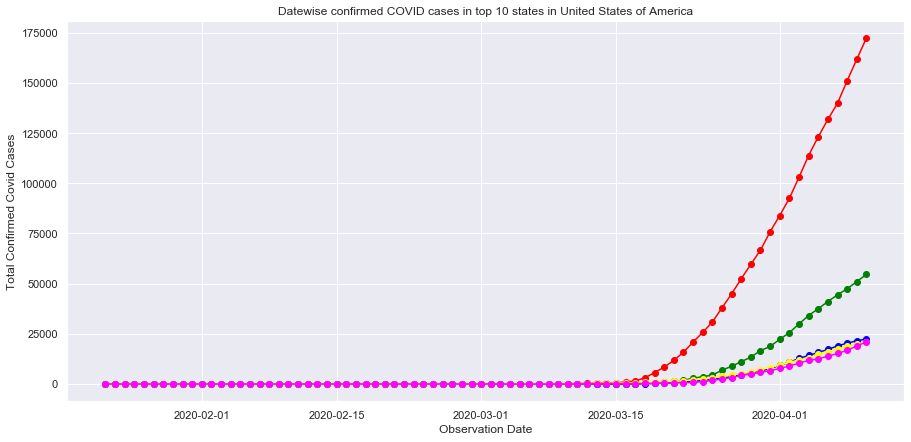

In [86]:
state_graph('United States of America')

In [69]:
ALL='All'
def city_variable(x):
    unique_country=x[x["Country"]=='US']
    unique_states=unique_country['State'].unique().tolist()
    unique_states.insert(0, 'All')
    return (unique_states)